In [1]:
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

import pandas as pd

In [2]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [3]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

In [4]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [5]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [6]:
def fitnessgrad():
    lambda1=(betam*(I1+(2*D11)))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    alpha1m = 0.1 - 0.157**2/0.2*(1 - np.exp(0.4*(betam - 0.75)/0.157))
    alpha1md = 0.314*np.exp(0.4*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((2*sigmaI*lambda1)/(mu+alpham+(sigmaI*lambda1)))*(((mu+alpha1m-(betam*alpha1md))/((mu+alpha1m)**2))-(((betam*alphamd)/(mu+alpha1m))/(mu+alpham+(sigmaI*lambda1))))) + sigmaS*S*((mu+alpham+(sigmaI*lambda1)-(betam*alphamd))/((mu+alpham+(sigmaI*lambda1))**2)) + 2*sigmaI*I1*((mu+alpha1m-(betam*alpha1md))/((mu+alpha1m)**2))
    return dr

# $\sigma_S$ and $\mu$

In [7]:
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [8]:
#muvals

In [9]:
#sigmaSvals

In [10]:
singstrat=np.zeros((10,10))
#singstrat

In [11]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,N):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("mu=", mu, "sigmaS=", sigmaS, "sings=",sings)
                break 

In [12]:
#singstrat # [row,column]

In [13]:
df = pd.DataFrame(singstrat,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

,1,2,3,4,5,6,7,8,9,10
0.005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005
0.010,0.2320,0.2321,0.2322,0.2322,0.2322,0.2322,0.2322,0.2322,0.2322,0.2322
0.015,0.3078,0.3080,0.3081,0.3081,0.3081,0.3081,0.3081,0.3081,0.3081,0.3081
0.020,0.3601,0.3604,0.3605,0.3605,0.3606,0.3606,0.3606,0.3606,0.3606,0.3606
0.025,0.4010,0.4014,0.4015,0.4016,0.4016,0.4016,0.4016,0.4016,0.4016,0.4017
0.030,0.4349,0.4354,0.4355,0.4356,0.4356,0.4357,0.4357,0.4357,0.4357,0.4357
0.035,0.4642,0.4647,0.4648,0.4649,0.4649,0.4650,0.4650,0.4650,0.4650,0.4650
0.040,0.4901,0.4905,0.4907,0.4907,0.4908,0.4908,0.4908,0.4908,0.4909,0.4909
0.045,0.5136,0.5137,0.5139,0.5139,0.5140,0.5140,0.5140,0.5140,0.5140,0.5141
0.050,0.5354,0.5349,0.5350,0.5350,0.5351,0.5351,0.5351,0.5351,0.5351,0.5351


Text(33.0, 0.5, 'Mortality Rate, $\\mu$')

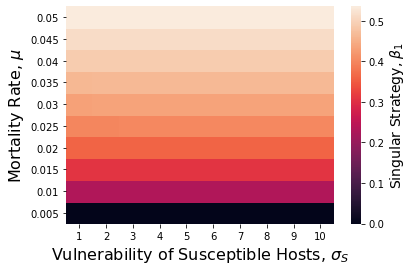

In [14]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_S$ and $\rho$

In [15]:
mu=0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [16]:
singstrat=np.zeros((10,10))

In [17]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,N):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("rho=", rho, "sigmaS=", sigmaS, "sings=",sings)
                break 

In [18]:
df = pd.DataFrame(singstrat,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(rhovals)])
df2

,1,2,3,4,5,6,7,8,9,10
0.005,0.3774,0.3607,0.3591,0.3585,0.3583,0.3581,0.3581,0.3580,0.3579,0.3579
0.010,0.3574,0.3578,0.3579,0.3580,0.3581,0.3581,0.3581,0.3581,0.3582,0.3582
0.015,0.3588,0.3593,0.3594,0.3595,0.3595,0.3596,0.3596,0.3596,0.3596,0.3596
0.020,0.3601,0.3604,0.3605,0.3605,0.3606,0.3606,0.3606,0.3606,0.3606,0.3606
0.025,0.3609,0.3611,0.3612,0.3612,0.3613,0.3613,0.3613,0.3613,0.3613,0.3613
0.030,0.3615,0.3617,0.3617,0.3617,0.3617,0.3618,0.3618,0.3618,0.3618,0.3618
0.035,0.3619,0.3620,0.3621,0.3621,0.3621,0.3621,0.3621,0.3621,0.3621,0.3621
0.040,0.3623,0.3623,0.3624,0.3624,0.3624,0.3624,0.3624,0.3624,0.3624,0.3624
0.045,0.3625,0.3626,0.3626,0.3626,0.3626,0.3626,0.3626,0.3626,0.3626,0.3626
0.050,0.3627,0.3628,0.3628,0.3628,0.3628,0.3628,0.3628,0.3628,0.3628,0.3628


Text(33.0, 0.5, 'Birth Rate, $\\rho$')

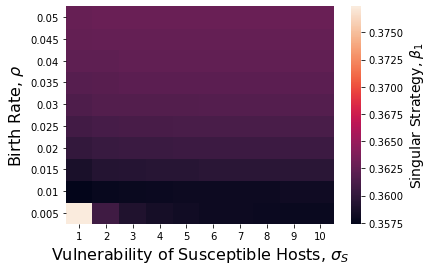

In [19]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Birth Rate, $\rho$',fontsize=16)    

# $\sigma_I$ and $\mu$

In [20]:
rho=0.02
sigmaS=1
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [21]:
singstrat=np.zeros((10,10))

In [22]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,N):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("mu=", mu, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [23]:
df = pd.DataFrame(singstrat,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

,1,2,3,4,5,6,7,8,9,10
0.005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005,-0.0005
0.010,0.2294,0.2289,0.2302,0.2313,0.2320,0.2326,0.2330,0.2333,0.2336,0.2338
0.015,0.3061,0.3046,0.3059,0.3070,0.3078,0.3084,0.3088,0.3092,0.3095,0.3097
0.020,0.3608,0.3573,0.3583,0.3593,0.3601,0.3607,0.3612,0.3615,0.3618,0.3621
0.025,0.4053,0.3991,0.3994,0.4003,0.4010,0.4016,0.4020,0.4024,0.4027,0.4029
0.030,0.4441,0.4344,0.4338,0.4343,0.4349,0.4355,0.4359,0.4362,0.4365,0.4368
0.035,0.4796,0.4655,0.4637,0.4638,0.4642,0.4646,0.4650,0.4653,0.4656,0.4659
0.040,0.5135,0.4940,0.4906,0.4900,0.4901,0.4904,0.4907,0.4910,0.4912,0.4914
0.045,0.5472,0.5212,0.5155,0.5139,0.5136,0.5136,0.5138,0.5140,0.5142,0.5144
0.050,0.5819,0.5482,0.5394,0.5364,0.5354,0.5350,0.5349,0.5350,0.5351,0.5352


Text(33.0, 0.5, 'Mortality Rate, $\\mu$')

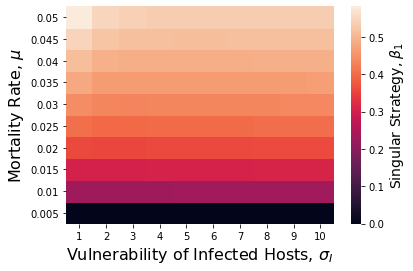

In [24]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_I$ and $\rho$

In [25]:
mu=0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=1, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [26]:
singstrat=np.zeros((10,10))

In [27]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,N):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("rho=", rho, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [28]:
df = pd.DataFrame(singstrat,columns=[1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(rhovals)])
df2

,1,2,3,4,5,6,7,8,9,10
0.005,0.5237,0.4415,0.4064,0.3881,0.3774,0.3707,0.3663,0.3634,0.3614,0.3600
0.010,0.3913,0.3645,0.3588,0.3574,0.3574,0.3577,0.3581,0.3586,0.3590,0.3594
0.015,0.3680,0.3579,0.3574,0.3581,0.3588,0.3595,0.3600,0.3605,0.3609,0.3612
0.020,0.3608,0.3573,0.3583,0.3593,0.3601,0.3607,0.3612,0.3615,0.3618,0.3621
0.025,0.3583,0.3579,0.3592,0.3602,0.3609,0.3614,0.3618,0.3621,0.3624,0.3626
0.030,0.3575,0.3585,0.3599,0.3609,0.3615,0.3620,0.3623,0.3625,0.3628,0.3629
0.035,0.3573,0.3591,0.3605,0.3614,0.3619,0.3623,0.3626,0.3628,0.3630,0.3632
0.040,0.3575,0.3596,0.3610,0.3617,0.3623,0.3626,0.3629,0.3631,0.3632,0.3633
0.045,0.3577,0.3601,0.3613,0.3620,0.3625,0.3628,0.3630,0.3632,0.3634,0.3635
0.050,0.3581,0.3605,0.3616,0.3623,0.3627,0.3630,0.3632,0.3633,0.3635,0.3636


Text(33.0, 0.5, 'Birth Rate, $\\rho$')

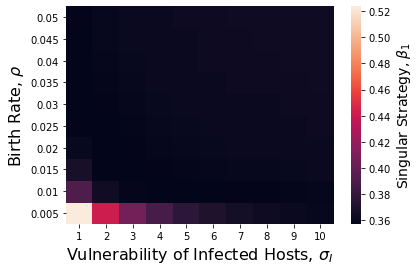

In [29]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Birth Rate, $\rho$',fontsize=16)    